# Classification Supervised Machine Learning

## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

import warnings
warnings.filterwarnings('ignore')

## Explore Data 

In [2]:
df=pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [4]:
df.shape

(3276, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.isnull().sum(axis=0)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df.duplicated().sum(axis=0)

0

In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


###  visualize missing values before handling it 

In [9]:
#plt.figure(figsize=(12,8))
#sns.heatmap(df.isnull())

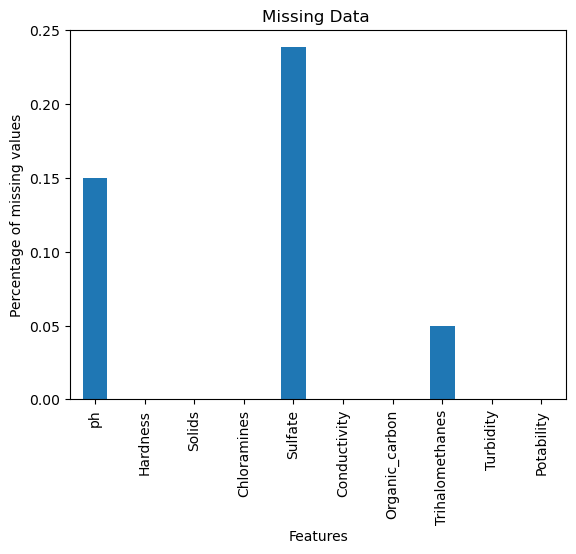

In [10]:
df.isnull().mean().plot.bar()
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data ');

## Data Visualization

In [11]:
#The relationship and interconnection between the columns
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


<Axes: >

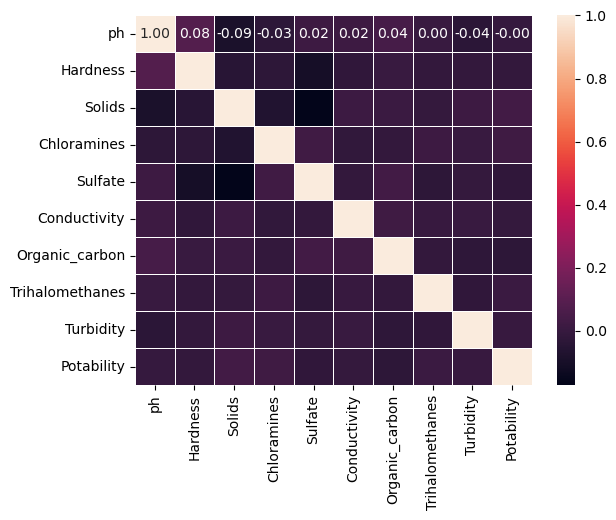

In [12]:
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.5)

In [13]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

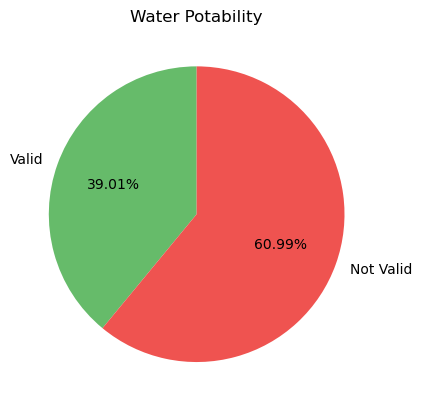

In [14]:
valid_count = df[df['Potability'] == 1].shape[0]
not_valid_count = df[df['Potability'] == 0].shape[0]

labels = ['Valid', 'Not Valid']
sizes = [valid_count, not_valid_count]
colors = ['#66BB6A', '#EF5350']

plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Water Potability')
plt.show()

<Axes: xlabel='Potability', ylabel='count'>

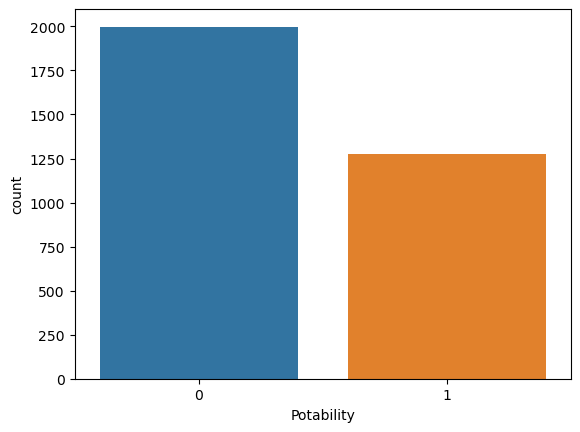

In [15]:
sns.countplot(x='Potability' , data=df )

####  visulaization for each column ,and also checking for outliers

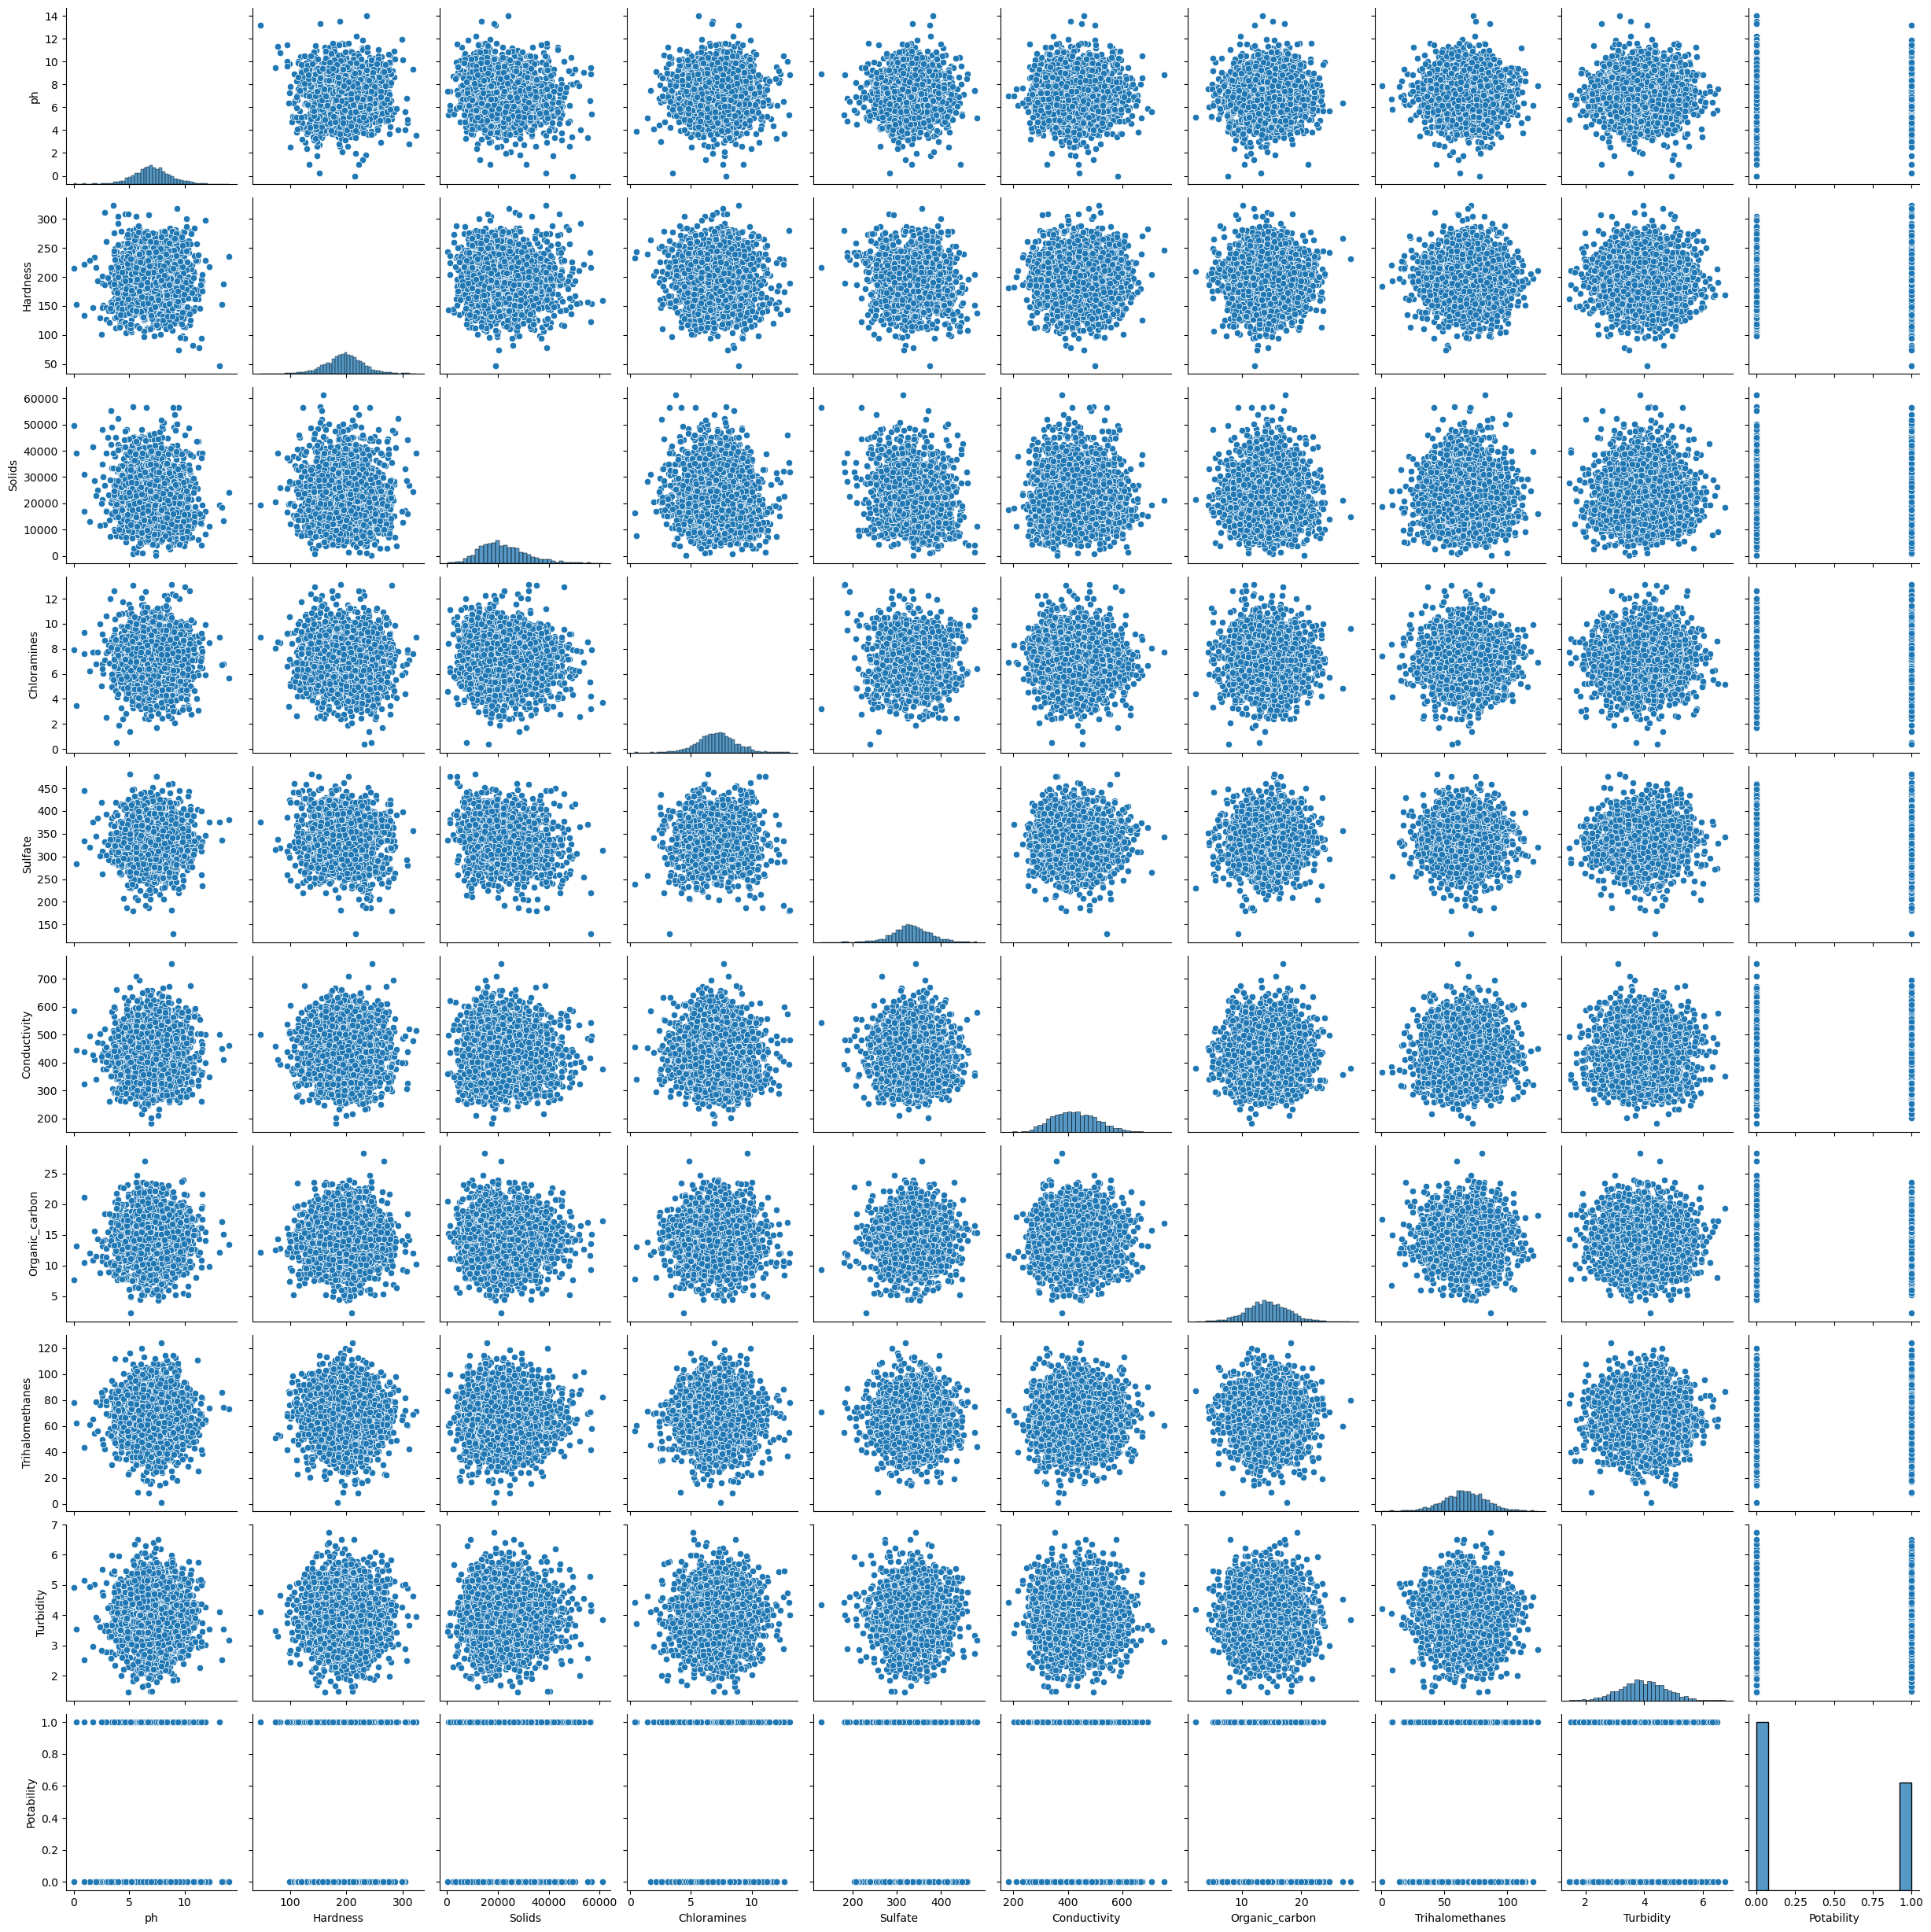

In [16]:
sns.pairplot(df)

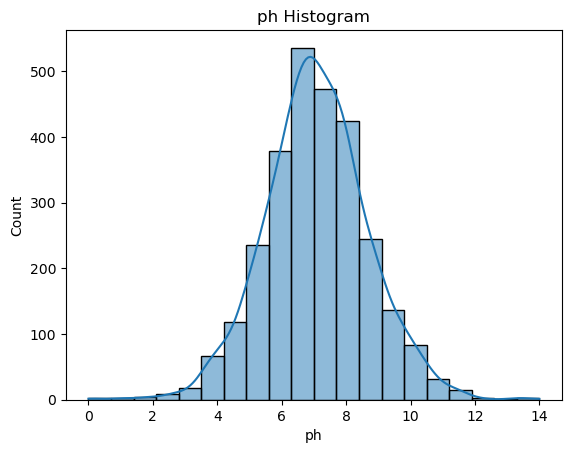

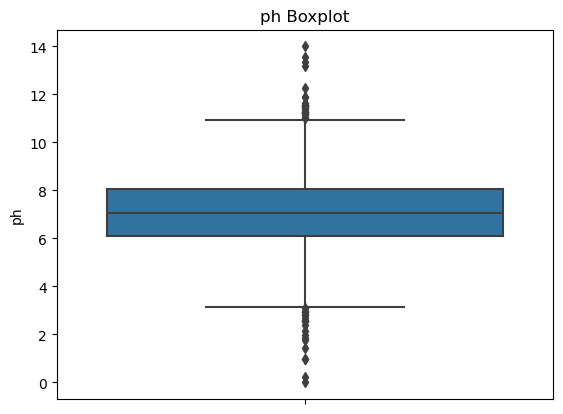

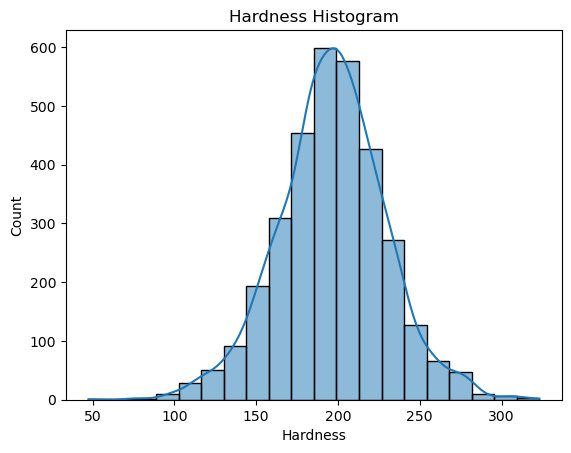

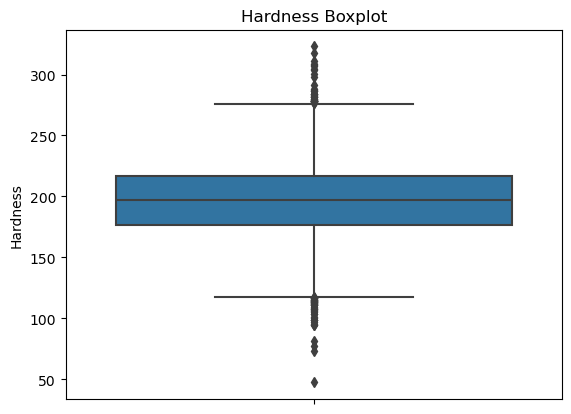

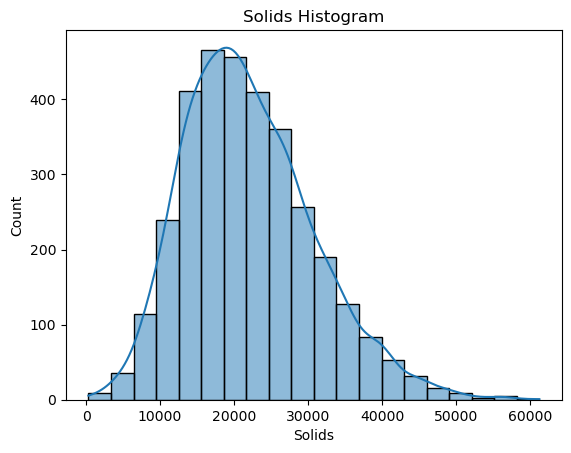

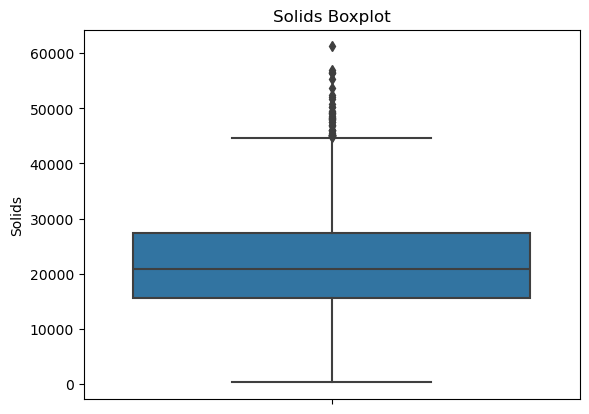

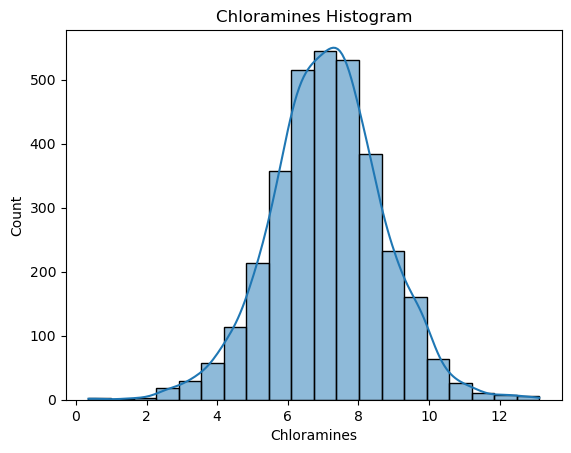

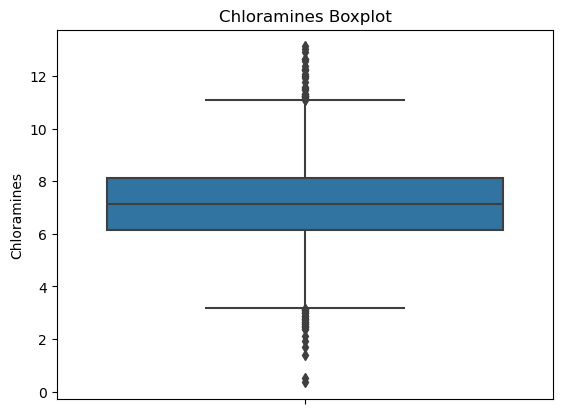

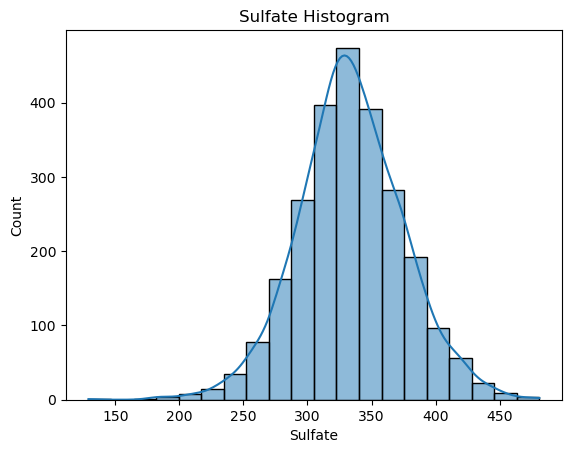

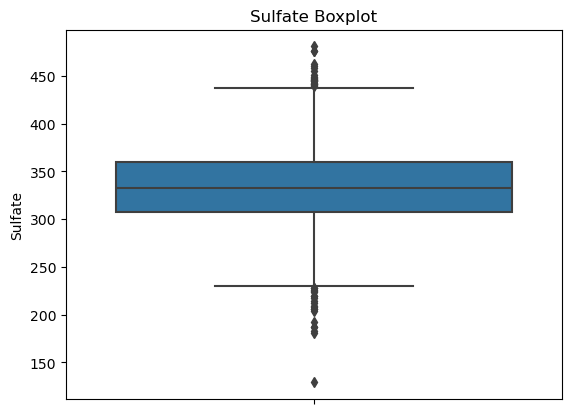

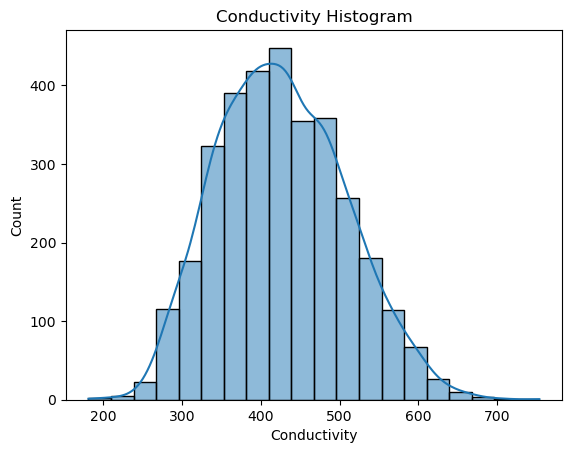

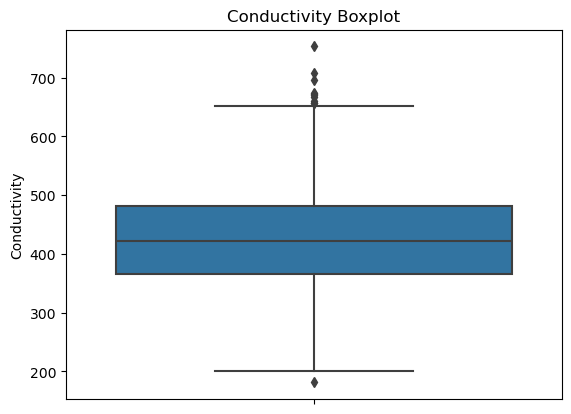

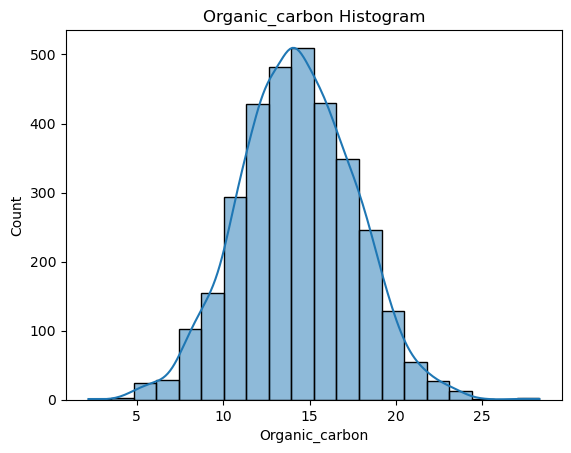

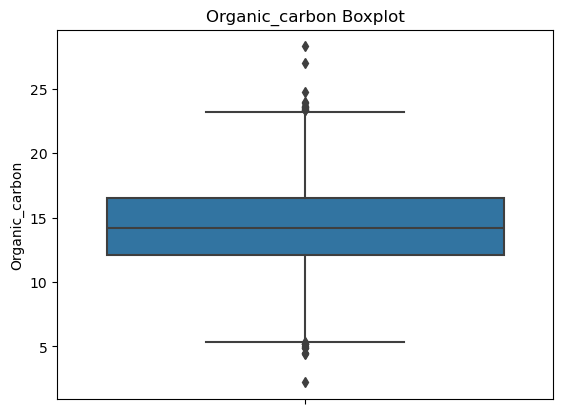

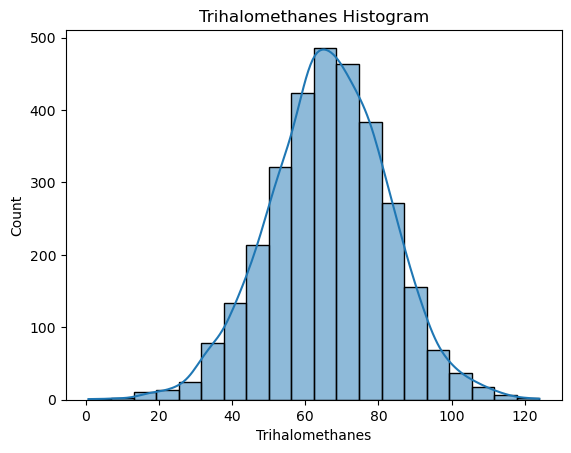

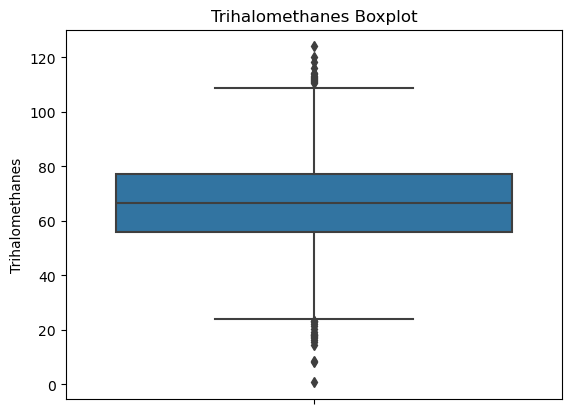

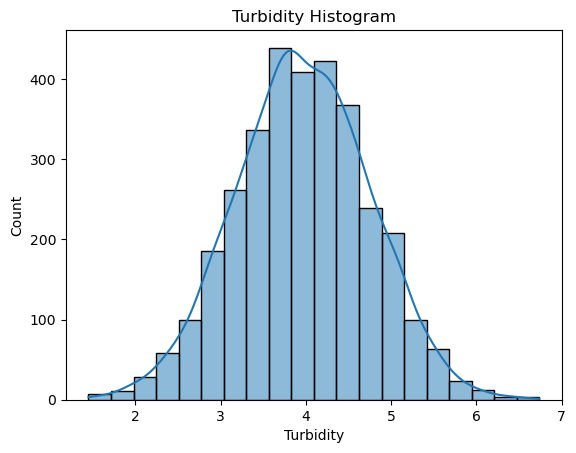

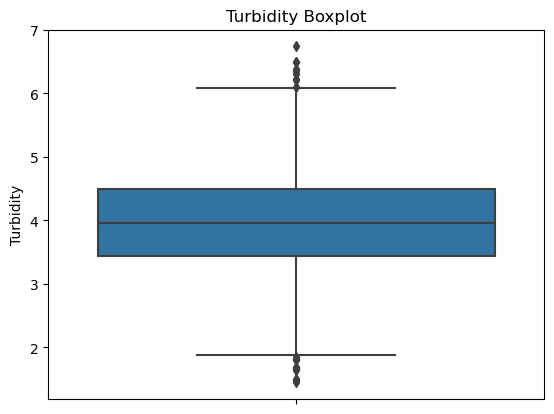

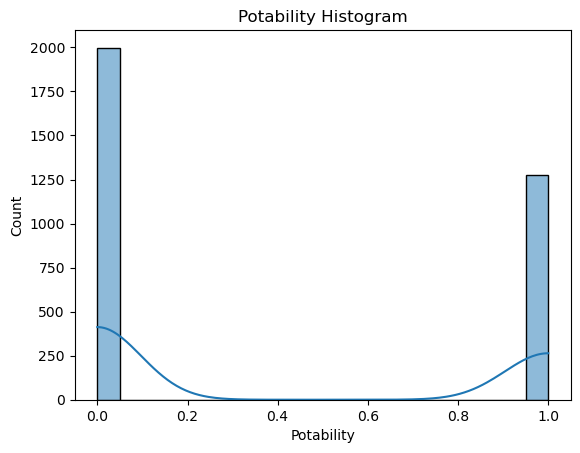

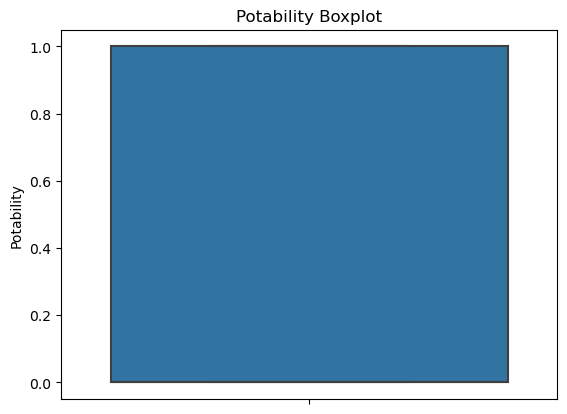

In [17]:
for column in df.columns:
    dtype = df[column].dtype
    
    
    if dtype == 'float64' or dtype == 'int64':
        plt.figure()
        sns.histplot(data=df, x=column, bins=20, kde=True)
        plt.title(column + " Histogram")
        plt.show()
        
        
        plt.figure()
        sns.boxplot(data=df, y=column)
        plt.title(column + " Boxplot")
        plt.show()
    else:
        print(df[column].value_counts())

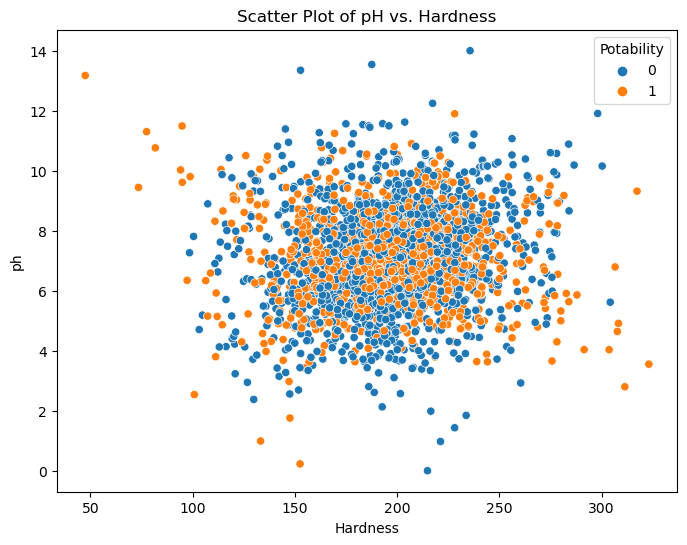

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Hardness', y='ph', hue='Potability')
plt.title('Scatter Plot of pH vs. Hardness')
plt.show()

## Handling Missing Values

In [19]:
df['ph'] = df['ph'].fillna( df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna( df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna( df['Trihalomethanes'].mean())

In [20]:
df.isnull().sum(axis=0)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [21]:
df.shape

(3276, 10)

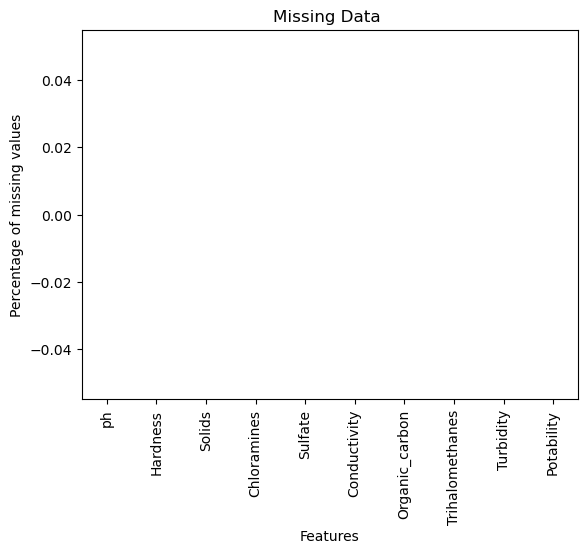

In [22]:
df.isnull().mean().plot.bar()
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data ');

## Create Model

In [23]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [24]:
x=df.drop('Potability' , axis=1)
y=df['Potability']

In [25]:
x.shape , y.shape

((3276, 9), (3276,))

In [26]:
scaler =StandardScaler()
x= scaler.fit_transform(x)
x

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
x_train.shape , x_test.shape

((2620, 9), (656, 9))

# Classification Algorithms

## LogisticRegression

In [29]:
model_lg = LogisticRegression()
model_lg.fit(x_train, y_train)
pred_lg = model_lg.predict(x_test)
lg = accuracy_score(y_test, pred_lg)
print("accuracy:",lg)
f1_lg = f1_score(y_test, pred_lg, average='weighted')
print("F1-score:", f1_lg)
print('\n')
classification=classification_report(y_test, pred_lg,zero_division=1) #no predicted samples, resulting in undefined precision and recall values
print(classification)

accuracy: 0.600609756097561
F1-score: 0.45074332171893144


              precision    recall  f1-score   support

           0       0.60      1.00      0.75       394
           1       1.00      0.00      0.00       262

    accuracy                           0.60       656
   macro avg       0.80      0.50      0.38       656
weighted avg       0.76      0.60      0.45       656



## DecisionTree

In [30]:
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(x_train,y_train)
pred_dt = model_dt.predict(x_test)
dt = accuracy_score(y_test, pred_dt)
print("accuracy:",dt)
f1_dt = f1_score(y_test, pred_dt)
print("dt_F1-score:", f1_dt)
print('\n')
classification=classification_report(y_test, pred_dt)
print(classification)

accuracy: 0.6189024390243902
dt_F1-score: 0.5039682539682541


              precision    recall  f1-score   support

           0       0.67      0.71      0.69       394
           1       0.52      0.48      0.50       262

    accuracy                           0.62       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.61      0.62      0.62       656



## KNN

In [31]:
model_knn = KNeighborsClassifier(n_neighbors=20) #num of point use to prediction
model_knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)
knn = accuracy_score(y_test, pred_knn)
print("accuracy:",knn)
f1_knn = f1_score(y_test, pred_knn, average='weighted')
print("F1-score:", f1_knn)
print('\n')
classification=classification_report(y_test, pred_knn)
print(classification)

accuracy: 0.6402439024390244
F1-score: 0.5833539301831985


              precision    recall  f1-score   support

           0       0.64      0.92      0.75       394
           1       0.65      0.22      0.33       262

    accuracy                           0.64       656
   macro avg       0.64      0.57      0.54       656
weighted avg       0.64      0.64      0.58       656



##  MLPClassifier

In [32]:
model_mpl = MLPClassifier()
model_mpl.fit(x_train, y_train)
pred_mpl = model_mpl.predict(x_test)
accuracy = accuracy_score(y_test, pred_mpl)
print("Accuracy:", accuracy)
f1_mpl = f1_score(y_test, pred_mpl, average='weighted')
print("F1-score:", f1_mpl)
print('\n')
classification=classification_report(y_test, pred_mpl)
print(classification)

Accuracy: 0.6844512195121951
F1-score: 0.6692644150333668


              precision    recall  f1-score   support

           0       0.70      0.85      0.76       394
           1       0.66      0.44      0.53       262

    accuracy                           0.68       656
   macro avg       0.68      0.64      0.65       656
weighted avg       0.68      0.68      0.67       656



## Compare with algorithms from where the highest accuracy

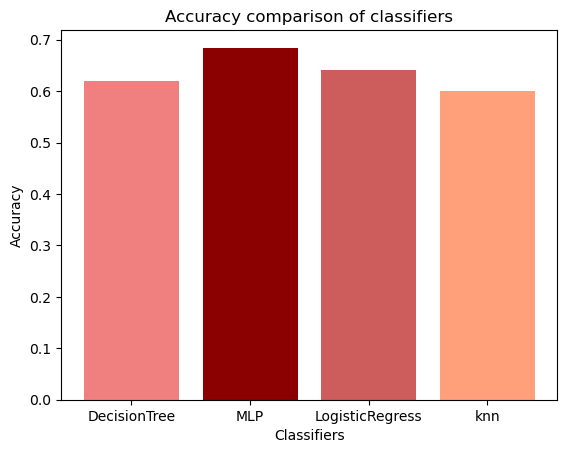

In [33]:
classifiers = ['DecisionTree', 'MLP', 'LogisticRegress', 'knn']
accuracies = [model_dt.score(x_test, y_test), model_mpl.score(x_test, y_test), model_knn.score(x_test, y_test), model_lg.score(x_test, y_test)]
colors = ['LightCoral','DarkRed', 'IndianRed', 'LightSalmon','LightPink']
plt.bar(classifiers, accuracies,color=colors )
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of classifiers')
plt.show()